In [1]:
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
import torch
from diffusers import StableDiffusionPipeline
from diffusers.utils import make_image_grid

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-05-10 22:57:10.654259: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 22:57:10.654351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 22:57:10.827098: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
pretrained_model_name_or_path = "runwayml/stable-diffusion-v1-5"


In [3]:
repo_id_embeds = "sd-concepts-library/dr-seuss-book-cover"

In [6]:
pipeline = StableDiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path, torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

pipeline.load_textual_inversion(repo_id_embeds)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

learned_embeds.bin:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [11]:
prompt = "a children's book cover in the style of <dr-seuss-book-cover> "

num_samples_per_row = 2
num_rows = 1

  0%|          | 0/50 [00:00<?, ?it/s]

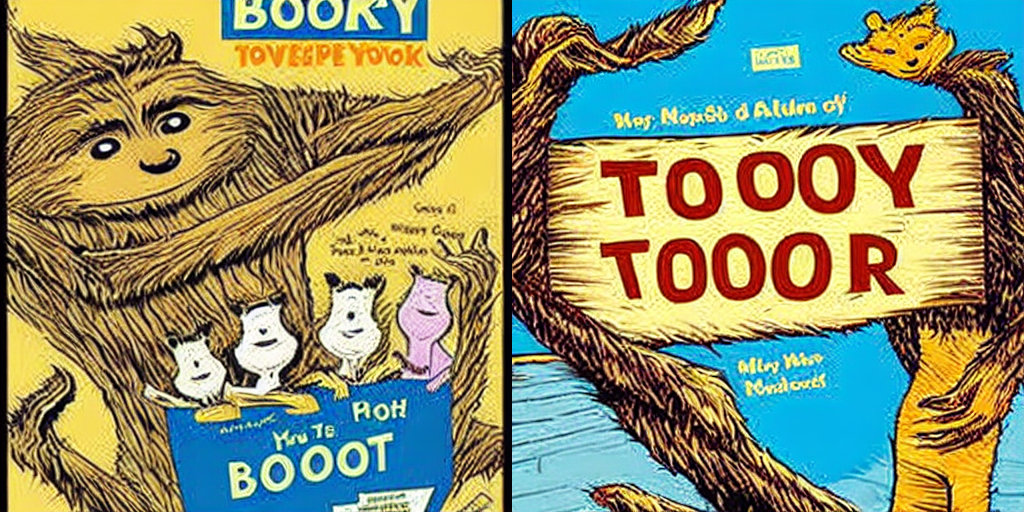

In [13]:
all_images = []
for _ in range(num_rows):
    images = pipeline(prompt, num_images_per_prompt=num_samples_per_row, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = make_image_grid(all_images, num_rows, num_samples_per_row)
grid